In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import shutil
import sys
import time
import pprint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

from tensorflow import keras

# print(tf.__version__)
# print(sys.version_info)
# for module in mpl, np, pd, sklearn, tf, keras:
#     print(module.__name__, module.__version__)
housing = fetch_california_housing()
# print(housing  .DESCR)
# print(housing.data.shape)
# print(housing.target.shape)
# pprint.pprint(housing.data[0:5])
# pprint.pprint(housing.target[0:5])
x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, random_state=11)
# print(x_train.shape, y_train.shape)
# print(x_valid.shape, y_valid.shape)
# print(x_test.shape, y_test.shape)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

2.1.0
sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)
matplotlib 2.2.2
numpy 1.18.1
pandas 0.25.3
sklearn 0.19.1
tensorflow 2.1.0
tensorflow_core.python.keras.api._v2.keras 2.2.4-tf


In [8]:
#函数式API 功能API
input = keras.layers.Input(shape=x_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation='relu')(input)
hidden11=keras.layers.BatchNormalization()(hidden1)   #批归一化

output = keras.layers.Dense(1)(hidden11)

#learning rate: [1e-4,3e-4,1e-3, 3e-3, 1e-2, 3e-2]
# W = W + grad * learning_rate
learning_rate = [1e-4,3e-4,1e-3, 3e-3, 1e-2, 3e-2]
histories = []
for lr in learning_rate:
    model = keras.models.Model(inputs=[input],
                          outputs=[output])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error",optimizer=optimizer)
    callbacks = [
             keras.callbacks.EarlyStopping(patience=10, min_delta=1e-2)] 
    #连续5次损失函数和上一次差距小于1e-3即可停止训练    
    his = model.fit(x_train_scaled,y_train,epochs=20, 
         validation_data=(x_valid_scaled,y_valid),
                 callbacks = callbacks)  #epochs 训练次数
    histories.append(his)
#终端命令 tensorboard --logdir=callbacks 
model.summary()

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 69us/sample - loss: 5.2262 - accuracy: 8.6133e-04 - val_loss: 3.8350 - val_accuracy: 2.5840e-04
Epoch 2/20
11610/11610 [==============================] - 0s 37us/sample - loss: 3.4719 - accuracy: 8.6133e-04 - val_loss: 2.7379 - val_accuracy: 5.1680e-04
Epoch 3/20
11610/11610 [==============================] - 0s 37us/sample - loss: 2.4928 - accuracy: 0.0011 - val_loss: 2.0147 - val_accuracy: 5.1680e-04
Epoch 4/20
11610/11610 [==============================] - 0s 38us/sample - loss: 1.8927 - accuracy: 0.0016 - val_loss: 1.5701 - val_accuracy: 5.1680e-04
Epoch 5/20
11610/11610 [==============================] - 0s 38us/sample - loss: 1.4863 - accuracy: 0.0017 - val_loss: 1.2578 - val_accuracy: 0.0010
Epoch 6/20
11610/11610 [==============================] - 0s 37us/sample - loss: 1.2039 - accuracy: 0.0023 - val_loss: 1.0821 - val_accuracy: 0.0018
Epoch 7/20
11610/11610 [=========

11610/11610 [==============================] - 0s 40us/sample - loss: 0.4270 - accuracy: 0.0029 - val_loss: 0.4541 - val_accuracy: 0.0023
Epoch 15/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4247 - accuracy: 0.0030 - val_loss: 0.4412 - val_accuracy: 0.0023
Epoch 16/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4204 - accuracy: 0.0031 - val_loss: 0.4821 - val_accuracy: 0.0023
Epoch 17/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4209 - accuracy: 0.0029 - val_loss: 0.4307 - val_accuracy: 0.0023
Epoch 18/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4207 - accuracy: 0.0029 - val_loss: 0.4571 - val_accuracy: 0.0023
Epoch 19/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.4167 - accuracy: 0.0029 - val_loss: 0.4254 - val_accuracy: 0.0023
Epoch 20/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.4229 - accuracy: 0.0031 - va

Epoch 10/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3794 - accuracy: 0.0030 - val_loss: 0.3754 - val_accuracy: 0.0023
Epoch 11/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3814 - accuracy: 0.0029 - val_loss: 0.3711 - val_accuracy: 0.0023
Epoch 12/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3799 - accuracy: 0.0029 - val_loss: 0.4119 - val_accuracy: 0.0023
Epoch 13/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3808 - accuracy: 0.0031 - val_loss: 0.3731 - val_accuracy: 0.0023
Epoch 14/20
11610/11610 [==============================] - 0s 39us/sample - loss: 0.3786 - accuracy: 0.0030 - val_loss: 0.3732 - val_accuracy: 0.0023
Epoch 15/20
11610/11610 [==============================] - 0s 40us/sample - loss: 0.3745 - accuracy: 0.0030 - val_loss: 0.3550 - val_accuracy: 0.0023
Epoch 16/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.3756 - accuracy:

Learing rate: 0.0001


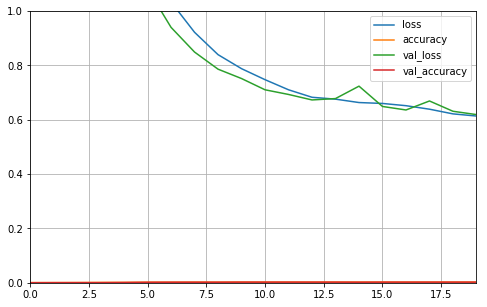

Learing rate: 0.0003


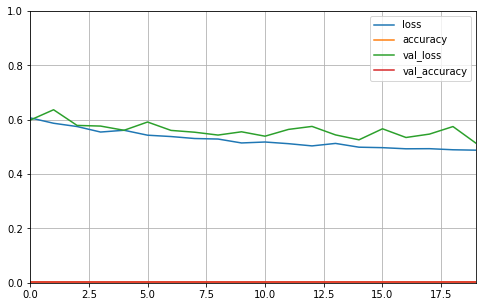

Learing rate: 0.001


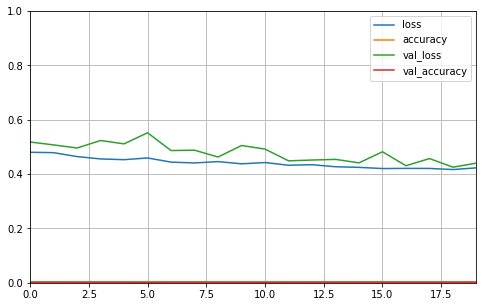

Learing rate: 0.003


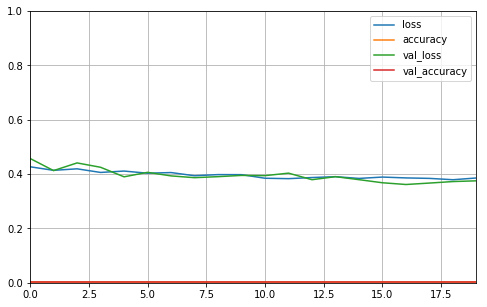

Learing rate: 0.01


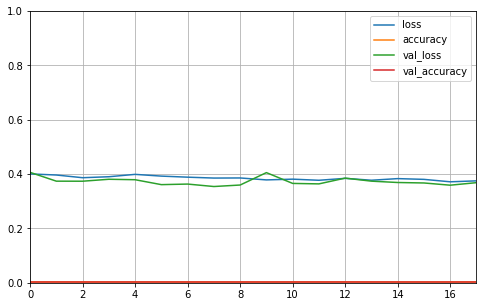

Learing rate: 0.03


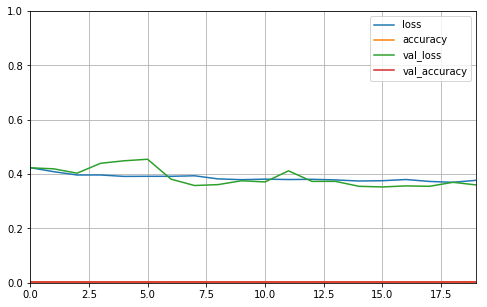

In [12]:
 def plot_learning_curves(his):
        pd.DataFrame(his.history).plot(figsize=(8,5))
        plt.grid(True)
        plt.gca().set_ylim(0,1)
        plt.show()
for lr,his in zip(learning_rate,histories):  
    print("Learing rate:", lr)
    plot_learning_curves(his)